In [1]:
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from rdkit.Chem import rdmolops
from rdkit.Chem import PeriodicTable
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Visualizing Molecular Graph from SMILES Using NetworkX

In cheminformatics, SMILES (Simplified Molecular Input Line Entry System) is a widely used notation for describing the structure of chemical compounds. However, to better understand the structure of a molecule, it can be useful to visualize the molecule as a graph, where atoms are represented as nodes and chemical bonds as edges. 

In this section, we will:

- Convert a SMILES string into a molecular graph using the RDKit library.
- Visualize the molecular graph using the `networkx` library, which is commonly used for graph data.

### Steps Involved:

1. **SMILES to Molecule Conversion**: We will use RDKit to convert a SMILES string into a molecular object. RDKit is a powerful toolkit that provides tools for chemical informatics, including functions to parse SMILES strings.
  
2. **Molecule to Graph**: After converting the SMILES string into a molecular object, we will transform this molecule into a graph. In the graph, each atom will be a node, and each bond will be an edge.

3. **Visualization**: Finally, we will use `networkx` to visualize the graph structure. Each atom will be labeled with its atomic symbol, and edges between atoms will represent the bonds in the molecule.

### Example SMILES String

The SMILES string we will work with in this section is: `O=S(=O)(O)CCS(=O)(=O)O`


This represents a molecule where sulfur and oxygen atoms form a key part of the structure, along with carbon atoms and single bonds.

By the end of this section, you will have a clear understanding of how to:
- Convert SMILES data to molecular graphs.
- Use RDKit and NetworkX to visualize the resulting structure.



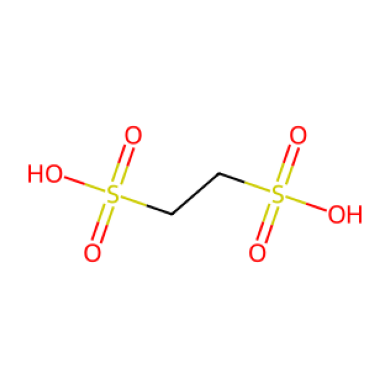

In [3]:
# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# SMILES string
smiles = 'O=S(=O)(O)CCS(=O)(=O)O'
# smiles = 'Brc1ccc(SSc2ccc(Br)cc2)cc1'

# Convert SMILES to a molecule object
molecule = Chem.MolFromSmiles(smiles)

# Check if molecule is valid
if molecule is None:
    print("Invalid SMILES string")
else:
    # Visualize the molecular structure
    img = Draw.MolToImage(molecule, size=(300, 300))

    # Display the molecular graph
    plt.imshow(img)
    plt.axis('off')
    plt.show()


# Converting Molecules to NumPy Data: Adjacency Matrix and Node Features

In graph-based machine learning, it's common to represent molecules as graphs, where atoms serve as nodes and chemical bonds represent edges. For machine learning tasks, we need a structured format, such as an adjacency matrix to represent the connections between atoms, and node features to describe the properties of each atom. In this section, we will convert a molecule from its SMILES representation into two essential components:

1. **Adjacency Matrix**: A binary matrix that represents the presence or absence of bonds between pairs of atoms.
2. **Node Features**: A feature matrix that describes the atoms in the molecule. In this case, we will use the atomic number (representing the atom type) as the feature for each node.

### Steps Involved:

1. **SMILES to Molecule**: We will begin by converting a SMILES string into a molecular object using the RDKit library. RDKit is highly efficient for parsing chemical data and extracting graph structures from molecules.

2. **Adjacency Matrix**: We will extract the adjacency matrix from the molecule, where the matrix element at position \((i, j)\) indicates whether there is a bond between atom \(i\) and atom \(j\).

3. **Node Features**: For each atom in the molecule, we will extract its atomic number as a simple feature representation. The atomic number corresponds to the type of atom (e.g., Oxygen = 8, Carbon = 6, Sulfur = 16).

### Example SMILES String

In this section, we will use the following SMILES string:  `O=S(=O)(O)CCS(=O)(=O)O`


This molecule contains sulfur (S), oxygen (O), and carbon (C) atoms, and several single and double bonds. By the end of this section, you will be able to:

- Generate an adjacency matrix for the molecular graph.
- Extract the atom types as node features in a NumPy array format.


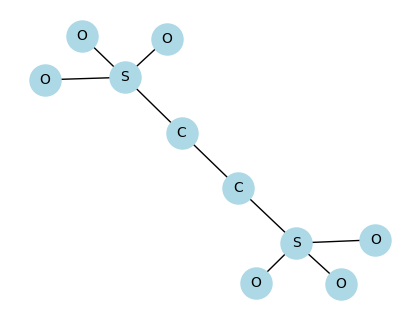

In [4]:
def mol_to_nx(molecule):
    G = nx.Graph()
    
    # Add nodes (atoms)
    for atom in molecule.GetAtoms():
        G.add_node(atom.GetIdx(), label=atom.GetSymbol())
    
    # Add edges (bonds)
    for bond in molecule.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())
    
    return G

# Convert molecule to a NetworkX graph
G = mol_to_nx(molecule)

# Get labels for the nodes (atoms)
labels = nx.get_node_attributes(G, 'label')

# Plot the molecular graph using NetworkX
plt.figure(figsize=(4, 3))
pos = nx.spring_layout(G)  # Position the nodes for visualization
nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

In [5]:
molecule = Chem.MolFromSmiles(smiles)

# Get the number of atoms in the molecule
num_atoms = molecule.GetNumAtoms()

# Initialize the adjacency matrix (num_atoms x num_atoms)
adj_matrix = rdmolops.GetAdjacencyMatrix(molecule)

# Get atom types as node features (atomic numbers and symbols)
atom_types = []
atom_symbols = []
atomic_num_symbol_map = {}

for atom in molecule.GetAtoms():
    atom_num = atom.GetAtomicNum()
    atom_symbol = atom.GetSymbol()
    
    atom_types.append(atom_num)  # Use atomic numbers as node features
    atom_symbols.append(atom_symbol)  # Use atomic symbols as labels
    
    # Map atomic number to symbol if not already in the map
    if atom_num not in atomic_num_symbol_map:
        atomic_num_symbol_map[atom_num] = atom_symbol
print("\nNode Features (Atom Types):")
for i, (atom_num, atom_symbol) in enumerate(zip(atom_types, atom_symbols)):
    print(f"Node {i}: Atomic Number = {atom_num}, Atom Type = {atom_symbol}")
print("\nAdjacency Matrix:")
print(adj_matrix)


Node Features (Atom Types):
Node 0: Atomic Number = 8, Atom Type = O
Node 1: Atomic Number = 16, Atom Type = S
Node 2: Atomic Number = 8, Atom Type = O
Node 3: Atomic Number = 8, Atom Type = O
Node 4: Atomic Number = 6, Atom Type = C
Node 5: Atomic Number = 6, Atom Type = C
Node 6: Atomic Number = 16, Atom Type = S
Node 7: Atomic Number = 8, Atom Type = O
Node 8: Atomic Number = 8, Atom Type = O
Node 9: Atomic Number = 8, Atom Type = O

Adjacency Matrix:
[[0 1 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 1 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


### Edge List Representation

In addition to using an adjacency matrix to represent the connections between atoms, another common way to represent graph structures is through an **edge list**. An edge list is a simple way to describe the connections (bonds) in a graph by listing pairs of nodes (atoms) that are connected by edges (bonds).

In the case of molecular graphs:
- **Nodes** represent atoms.
- **Edges** represent the bonds between atoms.

The edge list provides a more compact representation compared to the adjacency matrix, particularly for sparse graphs, where many possible connections do not exist.

### Steps to Create the Edge List:

1. **Extract Bonds from the Molecule**: Using RDKit, we extract the bonds between atoms. Each bond connects two atoms, which we can retrieve as a pair of indices.
  
2. **Build the Edge List**: For each bond in the molecule, we store the indices of the connected atoms as a tuple, creating an undirected edge list. Since chemical bonds are inherently undirected, we avoid adding duplicate edges.

3. **Interpret the Edge List**: Each tuple in the edge list represents a bond between two atoms, identified by their indices in the molecule.



In [6]:
edge_list = []
for bond in molecule.GetBonds():
    # Each bond connects two atoms (begin atom and end atom)
    atom1 = bond.GetBeginAtomIdx()
    atom2 = bond.GetEndAtomIdx()
    
    # Append both directions of the edge (atom1 -> atom2 and atom2 -> atom1)
    edge_list.append((atom1, atom2))
    edge_list.append((atom2, atom1))  # This ensures the edge is undirected

# Print the undirected edge list
print("\nUndirected Edge List:")
for edge in edge_list:
    print(edge)



Undirected Edge List:
(0, 1)
(1, 0)
(1, 2)
(2, 1)
(1, 3)
(3, 1)
(1, 4)
(4, 1)
(4, 5)
(5, 4)
(5, 6)
(6, 5)
(6, 7)
(7, 6)
(6, 8)
(8, 6)
(6, 9)
(9, 6)


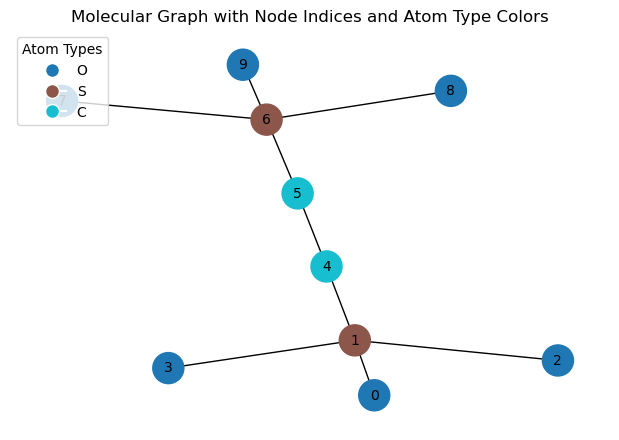

In [7]:
num_atom_types = len(atomic_num_symbol_map)

# Use the updated colormap call
cmap = plt.get_cmap('tab10', num_atom_types)  # Get a colormap with distinct colors
atom_type_color_map = {}

for i, atomic_num in enumerate(atomic_num_symbol_map.keys()):
    atom_type_color_map[atomic_num] = cmap(i)  # Assign a color for each unique atom type



# Create the graph using NetworkX
G = nx.Graph()
G.add_edges_from(edge_list)

# Create a list of node colors based on atom types
node_colors = [atom_type_color_map[atom_type] for atom_type in atom_types]

# Plot the graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)  # Positioning of the graph nodes

# Draw nodes with corresponding colors (use node index as labels)
nx.draw(G, pos, with_labels=True, labels={i: i for i in G.nodes()}, 
        node_color=node_colors, node_size=500, font_size=10)

# Create the legend manually for the atom types based on atomic_num_symbol_map
legend_labels = {atomic_num_symbol_map[num]: plt.Line2D([0], [0], marker='o', color='w', 
                    markerfacecolor=atom_type_color_map[num], markersize=10)
                    for num in atomic_num_symbol_map}

plt.legend(legend_labels.values(), legend_labels.keys(), title="Atom Types", loc="upper left")
plt.title("Molecular Graph with Node Indices and Atom Type Colors")
plt.show()

## Call the pre-defined function

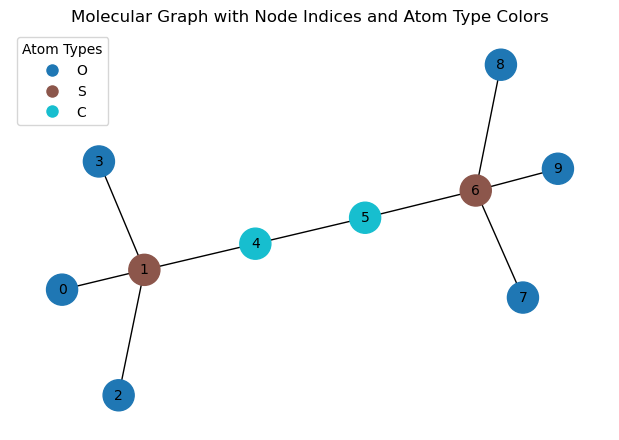

In [8]:
from utils import *
atom_types, adj_matrix, edge_list, atomic_num_symbol_map = process_molecule(smiles)
visualize_molecule_graph(edge_list, atom_types, atomic_num_symbol_map)

# Introduction to GCN
Graph Convolutional Networks (GCNs) are a type of neural network designed to work directly with graph-structured data. Unlike traditional convolutional neural networks (CNNs) that operate on grid-like data (such as images), GCNs are designed to generalize the convolution operation to the graph domain. This makes them powerful tools for tasks such as node classification, graph classification, and link prediction.

The key idea behind GCNs is to aggregate information from a node's neighbors and propagate this information through the network. Each layer of a GCN transforms the node features by combining the features of neighboring nodes, producing richer node representations at each layer. Formally, the graph convolution operation can be written as:

$$
H^{(l+1)} = \sigma(\tilde{D}^{-1/2} \tilde{A} \tilde{D}^{-1/2} H^{(l)} W^{(l)})
$$

Where:

- $\displaystyle H^{(l)}$ is the feature matrix at layer \(l\),
- $\displaystyle \tilde{A} = A + I$ is the adjacency matrix with added self-loops,
- $\displaystyle \tilde{D}$ is the degree matrix corresponding to $\tilde{A}$,
- $\displaystyle W^{(l)}$ is the weight matrix at layer \(l\),
- $\displaystyle \sigma$ is an activation function (e.g., ReLU).



In this section, we will build a GCN from scratch using only `NumPy`, following the steps of defining the graph structure, feature matrix, and implementing the graph convolutional layer.

### Step 1: Convert Edge List to Adjacency Matrix and Add Self-Loops

In this step, we will take the undirected `edge_list` and convert it into an adjacency matrix. The adjacency matrix will represent the connections between nodes (atoms in our case). After creating the basic adjacency matrix, we will also add self-loops to ensure each node connects to itself, which is important in GCNs for incorporating the node's own features.


In [9]:
num_nodes = len(atom_types)
adj_matrix = np.zeros((num_nodes, num_nodes))
for edge in edge_list:
    adj_matrix[edge[0], edge[1]] = 1
## Add self-loops
adj_matrix += np.eye(num_nodes)
print("Adjacency Matrix with Self-Loops:")
print(adj_matrix)

Adjacency Matrix with Self-Loops:
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]]


### Step 2: Normalize the Adjacency Matrix

In this step, we will normalize the adjacency matrix using the degree matrix. Normalization is essential for GCNs to ensure that the information passed between nodes is scaled properly. We use the formula:
$$
\hat{A} = D^{-\frac{1}{2}} A D^{-\frac{1}{2}}
$$
where $\displaystyle A $ is the adjacency matrix, and $\displaystyle D$ is the degree matrix (a diagonal matrix where each entry represents the degree of the corresponding node).


In [10]:
# Normalize the adjacency matrix with the degree matrix
degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
degree_matrix_inv_sqrt = np.linalg.inv(np.sqrt(degree_matrix))  # D^(-1/2)
adj_matrix_normalized = degree_matrix_inv_sqrt @ adj_matrix @ degree_matrix_inv_sqrt  # D^(-1/2) * A * D^(-1/2)
print("Normalized Adjacency Matrix:")
print(adj_matrix_normalized)

Normalized Adjacency Matrix:
[[0.5        0.31622777 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.31622777 0.2        0.31622777 0.31622777 0.25819889 0.
  0.         0.         0.         0.        ]
 [0.         0.31622777 0.5        0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.31622777 0.         0.5        0.         0.
  0.         0.         0.         0.        ]
 [0.         0.25819889 0.         0.         0.33333333 0.33333333
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.33333333 0.33333333
  0.25819889 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.25819889
  0.2        0.31622777 0.31622777 0.31622777]
 [0.         0.         0.         0.         0.         0.
  0.31622777 0.5        0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.31622777 0.         0.5    

### Step 3: Initialize Random Weights and Prepare Node Features

In this step, we will use the `atom_types` as the node features for the graph. These atomic numbers will be reshaped into a matrix. We will also initialize a random weight matrix for the GCN layer to transform the input features into a higher-dimensional space.


In [11]:
# Initialize the node features as the atomic numbers of the atoms
atom_feature = np.array(atom_types)

# Reshape node features: atomic numbers as 1D features for each node
input_features = atom_feature.reshape(-1, 1)  # Shape: (num_nodes, input_dim=1)

# Define the output dimension of the GCN layer (number of output features per node)
output_dim = 4  # Output dimension of the GCN layer

# Initialize random weights for the GCN layer (shape: input_dim x output_dim)
seed = 42
np.random.seed(seed)
weights = np.random.rand(1, output_dim)  # For simplicity, we use 1D input and 4D output

print("Input Features (Node Features):")
print(input_features)

print("\nRandomly Initialized Weights:")
print(weights)


Input Features (Node Features):
[[ 8]
 [16]
 [ 8]
 [ 8]
 [ 6]
 [ 6]
 [16]
 [ 8]
 [ 8]
 [ 8]]

Randomly Initialized Weights:
[[0.37454012 0.95071431 0.73199394 0.59865848]]


In [12]:
input_features.shape

(10, 1)

### Step 5: Implementing the GCN Layer

In this step, we define the core operation of the Graph Convolutional Network (GCN) layer. The GCN layer performs two main tasks:

1. **Message Passing**: This involves aggregating the features from a node’s neighbors, which is done by multiplying the normalized adjacency matrix $\displaystyle \hat{A}$ with the feature matrix $\displaystyle X$. This can be expressed as:
   $$
   H = \hat{A} X
   $$
   where:
   - $\displaystyle \hat{A}$ is the normalized adjacency matrix (from Step 3).
   - $\displaystyle X$ is the input feature matrix (from Step 4).

2. **Linear Transformation**: After the message passing step, the GCN applies a linear transformation using a weight matrix $\displaystyle W$. The transformed features are given by:
   $$
   H' = H W = \hat{A} X W
   $$

3. **Activation Function**: To introduce non-linearity, we apply the ReLU (Rectified Linear Unit) activation function, which is defined as:
   $$
   \text{ReLU}(x) = \max(0, x)
   $$
   The final output of the GCN layer is the activated feature matrix.

The function `gcn_layer` implements these operations.


In [13]:
# Define the ReLU function
def ReLU(x: np.ndarray) -> np.ndarray:
    return x * (x > 0)
# Dfine the softmax function
def softmax(x: np.ndarray) -> np.ndarray:
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stabilize softmax
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def gcn_layer(features, adj_norm, weights):
    # Perform message passing (adjacency matrix * features)
    aggregated_features = adj_norm @ features
    # Apply the weight matrix (linear transformation)
    transformed_features = aggregated_features @ weights
    # Apply an activation function (ReLU)
    activated_features = ReLU(transformed_features)  # ReLU
    return activated_features

In [14]:
adj_matrix_normalized @ input_features @ weights

array([[ 3.39320024,  8.61313341,  6.63160471,  5.4236329 ],
       [ 4.62132308, 11.73054032,  9.03182417,  7.38664333],
       [ 3.39320024,  8.61313341,  6.63160471,  5.4236329 ],
       [ 3.39320024,  8.61313341,  6.63160471,  5.4236329 ],
       [ 3.04545396,  7.73043128,  5.95197614,  4.86780123],
       [ 3.04545396,  7.73043128,  5.95197614,  4.86780123],
       [ 4.62132308, 11.73054032,  9.03182417,  7.38664333],
       [ 3.39320024,  8.61313341,  6.63160471,  5.4236329 ],
       [ 3.39320024,  8.61313341,  6.63160471,  5.4236329 ],
       [ 3.39320024,  8.61313341,  6.63160471,  5.4236329 ]])

In [15]:
gcn_output = gcn_layer(input_features, adj_matrix_normalized, weights)

# Output the GCN-transformed node features
print("GCN Output (Node Features after GCN Layer):")
print(gcn_output)

GCN Output (Node Features after GCN Layer):
[[ 3.39320024  8.61313341  6.63160471  5.4236329 ]
 [ 4.62132308 11.73054032  9.03182417  7.38664333]
 [ 3.39320024  8.61313341  6.63160471  5.4236329 ]
 [ 3.39320024  8.61313341  6.63160471  5.4236329 ]
 [ 3.04545396  7.73043128  5.95197614  4.86780123]
 [ 3.04545396  7.73043128  5.95197614  4.86780123]
 [ 4.62132308 11.73054032  9.03182417  7.38664333]
 [ 3.39320024  8.61313341  6.63160471  5.4236329 ]
 [ 3.39320024  8.61313341  6.63160471  5.4236329 ]
 [ 3.39320024  8.61313341  6.63160471  5.4236329 ]]


#### Wrap them together in torch

In [16]:
class GraphProcessor:
    def __init__(self, edge_list):
        """
        Initialize the GraphProcessor with an edge list and number of nodes.
        Parameters:
        - edge_list: List of edges in the graph (undirected).
        """
        self.edge_list = edge_list
        self.num_nodes = max(torch.tensor(edge_list).flatten()) + 1
        self.adj_matrix = self.build_adj_matrix()
        
    def build_adj_matrix(self):
        """
        Converts the edge list to an adjacency matrix.
        Returns:
        - Adjacency matrix (num_nodes x num_nodes).
        """
        adj_matrix = torch.zeros((self.num_nodes, self.num_nodes))
        for edge in self.edge_list:
            adj_matrix[edge[0], edge[1]] = 1
        return adj_matrix

    def add_self_loops(self):
        """
        Adds self-loops to the adjacency matrix.
        """
        self.adj_matrix += torch.eye(self.num_nodes)

    def normalize_adj_matrix(self):
        """
        Normalizes the adjacency matrix using D^(-1/2) * A * D^(-1/2).
        Returns:
        - Normalized adjacency matrix.
        """
        # Compute degree matrix (sum of connections for each node)
        degree_matrix = torch.diag(torch.sum(self.adj_matrix, dim=1))
        
        # Compute D^(-1/2) (invert the square root of degree matrix)
        degree_matrix_inv_sqrt = torch.pow(degree_matrix, -0.5)
        degree_matrix_inv_sqrt[torch.isinf(degree_matrix_inv_sqrt)] = 0  # Set inf to 0 (for isolated nodes)
        
        # Return normalized adjacency matrix: D^(-1/2) * A * D^(-1/2)
        adj_matrix_normalized = degree_matrix_inv_sqrt @ self.adj_matrix @ degree_matrix_inv_sqrt
        
        return adj_matrix_normalized

In [17]:
graph_processor = GraphProcessor(edge_list)

# Add self-loops to the adjacency matrix
graph_processor.add_self_loops()

# Normalize the adjacency matrix
adj_matrix_normalized = graph_processor.normalize_adj_matrix()

# Print the normalized adjacency matrix
print("Normalized Adjacency Matrix:")
print(adj_matrix_normalized)


Normalized Adjacency Matrix:
tensor([[0.5000, 0.3162, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.3162, 0.2000, 0.3162, 0.3162, 0.2582, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.3162, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.3162, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.2582, 0.0000, 0.0000, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3333, 0.3333, 0.2582, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2582, 0.2000, 0.3162, 0.3162,
         0.3162],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3162, 0.5000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3162, 0.0000, 0.5000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3162, 0.0000, 0.0000,

In [18]:
class GCNLayer(nn.Module):
    def __init__(self, input_dim_dim, out_feat_dim, seed=42):
        """
        Initialize the GCN layer with random weights and zero biases.
        Parameters:
        - input_dim_dim: Number of input features (dimensionality of input node features).
        - out_feat_dim: Number of output features (dimensionality of output node features).
        """
        super(GCNLayer, self).__init__()  # Initialize nn.Module
        torch.manual_seed(seed)  # Set seed for reproducibility
        
        # Define the weight as a learnable parameter
        self.weight = nn.Parameter(torch.randn(input_dim_dim, out_feat_dim))
        
        # Define the bias as a learnable parameter
        self.bias = nn.Parameter(torch.zeros(out_feat_dim))

        self.A_normalized = None  # Normalized adjacency matrix will be calculated

    def forward(self, X: torch.Tensor, edge_list: list) -> torch.Tensor:
        """
        Forward pass of the GCN layer.
        Parameters:
        - X: Input feature matrix (nodes x input_features)
        - edge_list: List of edges in the graph (undirected).
        
        Returns:
        - Output feature matrix after applying GCN layer.
        """
        # Add self-loops and normalize the adjacency matrix
        graph_processor = GraphProcessor(edge_list)
        graph_processor.add_self_loops()
        self.A_normalized = graph_processor.normalize_adj_matrix()

        # Message passing (A_normalized * X)
        message_passing = torch.matmul(self.A_normalized, X)

        # Linear transformation (message_passing * weight + bias)
        output = torch.matmul(message_passing, self.weight) + self.bias
        
        # Apply ReLU activation function using PyTorch
        return F.relu(output)

In [19]:
model = GCNLayer(input_dim_dim = 1, out_feat_dim = 4)
model.weight = torch.nn.Parameter(torch.tensor(weights).float())
model.forward(torch.tensor(input_features).float(), edge_list)

tensor([[ 3.3932,  8.6131,  6.6316,  5.4236],
        [ 4.6213, 11.7305,  9.0318,  7.3866],
        [ 3.3932,  8.6131,  6.6316,  5.4236],
        [ 3.3932,  8.6131,  6.6316,  5.4236],
        [ 3.0455,  7.7304,  5.9520,  4.8678],
        [ 3.0455,  7.7304,  5.9520,  4.8678],
        [ 4.6213, 11.7305,  9.0318,  7.3866],
        [ 3.3932,  8.6131,  6.6316,  5.4236],
        [ 3.3932,  8.6131,  6.6316,  5.4236],
        [ 3.3932,  8.6131,  6.6316,  5.4236]], grad_fn=<ReluBackward0>)

### Step 6: Defining Pooling Functions for Graph-Level Task (Classification/Regression)

In graph classification tasks, we need to aggregate node features into a single graph-level feature vector. This aggregation is achieved through pooling operations. Below are two commonly used pooling methods:

#### 1. Global Mean Pooling

Global mean pooling computes the average of the node features across all nodes:
$$
H_{\text{graph}} = \frac{1}{N} \sum_{i=1}^{N} H_i
$$
where:
- $\displaystyle H_i$ represents the feature vector of the $\displaystyle i$-th node,
- $\displaystyle N$ is the total number of nodes in the graph.

This method effectively summarizes the graph by averaging all node features.

#### 2. Global Max Pooling

Global max pooling takes the maximum value for each feature across all nodes:
$$
H_{\text{graph}} = \max_{i=1}^{N} H_i
$$
This method emphasizes the most important or largest feature values in the graph, which can be useful when only certain nodes dominate the representation.

We can now define these pooling functions to aggregate node features into a single vector suitable for graph-level classification.


In [20]:
def global_mean_pooling(H: torch.Tensor) -> torch.Tensor:
    """
    Global mean pooling: Aggregates node features by averaging them.
    Parameters:
    - H: Node feature matrix (nodes x features)
    
    Returns:
    - Aggregated graph-level feature vector (1 x features)
    """
    return torch.mean(H, dim=0, keepdim=True)


def global_max_pooling(H: torch.Tensor) -> torch.Tensor:
    """
    Global max pooling: Aggregates node features by taking the maximum.
    Parameters:
    - H: Node feature matrix (nodes x features)
    
    Returns:
    - Aggregated graph-level feature vector (1 x features)
    """
    return torch.max(H, dim=0, keepdim=True).values

### Step 7: Final Graph Convolutional Network (GCN) Class for Classfication

The Graph Convolutional Network (GCN) class is designed to perform graph-level classification. It consists of multiple layers of graph convolution operations, followed by a pooling operation to aggregate node features into a single graph-level representation. The GCN class can be configured with a flexible number of layers and different pooling methods to suit various tasks.

#### Components:
- **Input Layer**: The first GCN layer that takes in node features.
- **Hidden Layers**: One or more hidden GCN layers that further transform the node features through message passing.
- **Output Layer**: A final GCN layer that produces graph-level embeddings for classification.
- **Pooling**: The node features are aggregated using a pooling function (mean, max, or sum) to produce a graph-level feature vector.
- **Softmax**: Softmax is applied at the end to convert the graph-level feature vector into class probabilities for classification tasks.

The GCN class uses PyTorch's `nn.Module` and is fully compatible with PyTorch's automatic differentiation and optimization system.


In [21]:
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_class, layers=2, pooling="mean"):
        """
        Initializes a multi-layer GCN model with global pooling.
        Parameters:
        - input_dim: Input feature dimension.
        - hidden_dim: Hidden layer dimension.
        - num_class: number of classes.
        - layers: Number of hidden layers.
        - pooling: Pooling method ('mean', 'max', or 'sum')
        """
        super(GCN, self).__init__()

        # Input layer (first GCN layer)
        self.init_layer = GCNLayer(input_dim, hidden_dim)
        
        # Hidden layers (additional GCN layers)
        self.hidden_layers = nn.ModuleList([GCNLayer(hidden_dim, hidden_dim) for _ in range(layers)])
        
        # Output layer (final GCN layer)
        self.out_layer = GCNLayer(hidden_dim, num_class)
        
        # Pooling method
        self.pooling = pooling

    def forward(self, X: torch.Tensor, edge_list: list) -> torch.Tensor:
        """
        Forward pass of the GCN model.
        Parameters:
        - X: Input feature matrix (nodes x input_features)
        - edge_list: List of edges in the graph (undirected).
        
        Returns:
        - Softmax probabilities for graph-level classification
        """
        # Pass through the initial GCN layer
        H = F.relu(self.init_layer(X, edge_list))
        
        # Pass through the hidden GCN layers
        for layer in self.hidden_layers:
            H = F.relu(layer(H, edge_list))
        
        # Output layer
        H_out = self.out_layer(H, edge_list)
        
        # Apply the specified pooling method to get graph-level features
        if self.pooling == "mean":
            H_graph = global_mean_pooling(H_out)
        elif self.pooling == "max":
            H_graph = global_max_pooling(H_out)
        else:
            H_graph = torch.sum(H_out, dim=0, keepdim=True)  # Sum pooling
        return H_graph

In [22]:
model = GCN(input_dim=1, hidden_dim=4, num_class=2, layers=2, pooling="mean")
model(X=torch.tensor(input_features).float(), edge_list=edge_list)

tensor([[0.2736, 0.8284]], grad_fn=<MeanBackward1>)

In [23]:
model

GCN(
  (init_layer): GCNLayer()
  (hidden_layers): ModuleList(
    (0-1): 2 x GCNLayer()
  )
  (out_layer): GCNLayer()
)

### Step 8: Defining the Loss Function and Implementing Backpropagation with SGD

In this step, we will define the loss function and implement backpropagation for graph classification using stochastic gradient descent (SGD).

#### 1. Loss Function: Binary Cross-Entropy

For binary classification, we use the **Binary Cross-Entropy** loss function:
$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$
where:
- $\displaystyle N$ is the number of samples (nodes),
- $\displaystyle y_i$ is the true label of the $i$-th node,
- $\displaystyle \hat{y}_i$ is the predicted probability of the $i$-th node.

This loss function will help measure the difference between the predicted probabilities and the true labels.

#### 2. Backpropagation with Stochastic Gradient Descent (SGD)

To perform backpropagation, we compute the gradient of the loss with respect to the weights and update the weights using the following rule:
$$
W \leftarrow W - \eta \nabla_W L
$$
where:
- $\displaystyle W$ is the weight matrix,
- $\displaystyle \eta$ is the learning rate,
- $\displaystyle \nabla_W L$ is the gradient of the loss with respect to $\displaystyle W$.


In [24]:
# Define the binary cross-entropy loss function
loss_fn = nn.CrossEntropyLoss()


- `model`: the GCN model defined earlier
- `X`: input node features
- `edge_list`: the edges in the graph
- `y_true`: true labels for graph-level classification (1 for positive class, 0 for negative class)

#### Example binary labels (1 for positive class, 0 for negative class)

In [25]:
y_true = torch.tensor([1])  # True label for the graph (binary classification)

# Initialize the optimizer (SGD with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)
X = torch.tensor(input_features).float()
# Forward pass
y_pred = model(X, edge_list)  # Predicted output (after softmax in the model)

# Compute binary cross-entropy loss
loss = loss_fn(y_pred, y_true)

# Backward pass (compute gradients)
loss.backward()

# Update weights using stochastic gradient descent
optimizer.step()

# Zero gradients after each step
optimizer.zero_grad()

# Print the loss
print(f"Loss: {loss.item()}")


Loss: 0.4537472426891327


In [26]:
class GCNTrainer:
    def __init__(self, model, learning_rate=0.01):
        """
        Initialize the GCNTrainer.
        Parameters:
        - model: The GCN model to be trained.
        - learning_rate: Learning rate for the SGD optimizer.
        """
        self.model = model
        self.optimizer = optim.SGD(self.model.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()  # For multi-class or binary classification

    def train(self, X, edge_list, y_true):
        """
        Perform a single training step: forward pass, loss calculation, backward pass, and optimization.
        Parameters:
        - X: Input node features (tensor).
        - edge_list: List of edges in the graph.
        - y_true: True labels for graph-level classification (tensor).
        
        Returns:
        - loss.item(): The loss value for the current training step.
        """
        # Ensure inputs are tensors
        X = torch.tensor(X).float()  # Convert input features to float tensor if not already
        y_true = torch.tensor(y_true).long()  # True label (in class label format)

        # Zero the gradients
        self.optimizer.zero_grad()

        # Forward pass: Compute predicted output from the model
        y_pred = self.model(X, edge_list)

        # Compute loss: Cross-entropy loss between predictions and true labels
        loss = self.loss_fn(y_pred, y_true)

        # Backward pass: Compute gradients
        loss.backward()

        # Update weights using Optimizer
        self.optimizer.step()

        # Return the loss value for logging
        return loss.item()

    def evaluate(self, X, edge_list):
        """
        Evaluate the model on the input data without computing gradients.
        Parameters:
        - X: Input node features (tensor).
        - edge_list: List of edges in the graph.
        
        Returns:
        - Predicted class probabilities.
        """
        self.model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation for evaluation
            X = torch.tensor(X).float()  # Ensure input is a float tensor
            y_pred = self.model(X, edge_list)
        self.model.train()  # Set the model back to training mode
        return y_pred

In [27]:
model = GCN(input_dim=1, hidden_dim=4, num_class=2, layers=2, pooling="mean")
y_true = np.array([1])  # Binary label (1 for positive class, 0 for negative class)
# Initialize the trainer class
trainer = GCNTrainer(model=model, learning_rate=0.01)
for epoch in range(10):
    loss = trainer.train(input_features, edge_list, y_true)

    # Print the loss
    print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

Epoch 1, Loss: 0.4537
Epoch 2, Loss: 0.2200
Epoch 3, Loss: 0.1123
Epoch 4, Loss: 0.0731
Epoch 5, Loss: 0.0534
Epoch 6, Loss: 0.0416
Epoch 7, Loss: 0.0339
Epoch 8, Loss: 0.0284
Epoch 9, Loss: 0.0244
Epoch 10, Loss: 0.0213


In [28]:
out = trainer.evaluate(input_features, edge_list)
out_prob = F.softmax(out, dim=1)
out_prob

tensor([[0.0187, 0.9813]])